In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def draw_image(img):
    plt.imshow(img, cmap='gray')
    #plt.title(img)
    plt.show()

## [0] Data load
패션 MNIST 데이터셋을 불러옵니다. 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(img, y_train),(img_test, y_test) = fashion_mnist.load_data()
print('* Load')
print('Train set: ', img.shape, img[0][10])
print('Test set: ', img_test.shape, img_test[0][10])

* Load
Train set:  (60000, 28, 28) [  0   0   0   0   0   0   0   0   0   0   0   0   0 193 228 218 213 198
 180 212 210 211 213 223 220 243 202   0]
Test set:  (10000, 28, 28) [  0   0   0   0   0   0   0   0   0   0   0   0   0   4   0  53 129 120
 147 175 157 166 135 154 168 140   0   0]


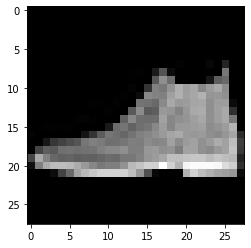

In [3]:
draw_image(img_test[0])

- 불러온 이미지를 prepocessing 함수를 통해 데이터셋으로 변환

In [4]:
def preProcessing(img, img_test):

    # reshape
    
    x_train = np.reshape(img, (60000, 28,28,1))
    x_test = np.reshape(img_test, (10000, 28,28,1))

    print('* Flatten')
    print(x_train.shape, x_train[0][300:328])

    # Normalize
    
    x_train = x_train/255
    x_test = x_test/255
    
    print('* Normailze')
    print(x_train.shape, x_train[0][300:328])
    
    return x_train, x_test

In [5]:
x_train, x_test = preProcessing(img, img_test)

* Flatten
(60000, 28, 28, 1) []
* Normailze
(60000, 28, 28, 1) []


## [1] 14장 559쪽 Covlutional Neural Network (CNN)

- 모델의 특징
model_k : 첫번째 층은 64개의 큰 필터(7x7)와 스트라이드 1을 사용합니다. 이미지가 28x28 픽셀 크기이고 하나의 컬러 채널(그레이스케일)이므로
          input_shape = [28, 28, 1]로 지정합니다.
          
          풀링 크기가 2인 최대 풀링 층을 추가하여 공간 방향 차원을 절반으로 줄입니다.
          
          CNN이 출력층에 다다를수록 필터 개수가 늘어나는데, 저수준 특성(예를 들면 작은 동심원, 수평선)의 개수는 적지만 이를 연결하여 고수준 특성을 만들 수 있는 방법이 많기 때문에 이런 구조가 합리적입니다. 
          
          그 다음 Dense layer..두 개의 은닉층과 하나의 출력층으로 구성된 완전 연결 네트워크입니다. dense layer는 샘플의 특성으로 1차원 배열을 기대하므로, 입력을 일렬로 펼쳐야 합니다 (flatten이 그 역할을 합니다). 또 밀집 층 사이에 over fitting을 줄이기 위해 50% 드롭아웃 층을 추가합니다. 

In [6]:
def make_model_mnist_fashion():

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, 7, activation = "relu", padding = "same", input_shape = [28, 28, 1]),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
        tf.keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(256, 3, activation = "relu", padding = "same"),
        tf.keras.layers.Conv2D(256, 3, activation = "relu", padding = "same"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation = "relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])
    
    return model

In [7]:
#모델 생성
model_k=make_model_mnist_fashion()

# 모델 컴파일
model_k.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 콜백 선언
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model_k.h5', save_best_only=True)

# 모델 훈련
model_k.fit(x_train, y_train, 
            validation_split=0.2,
            epochs=20,
            callbacks=[model_checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 183s 122ms/step - loss: 0.8010 - accuracy: 0.7132 - val_loss: 0.4024 - val_accuracy: 0.8532
Epoch 2/20
1500/1500 [==============================] - 186s 124ms/step - loss: 0.4540 - accuracy: 0.8453 - val_loss: 0.3339 - val_accuracy: 0.8844
Epoch 3/20
1500/1500 [==============================] - 202s 135ms/step - loss: 0.3852 - accuracy: 0.8668 - val_loss: 0.3042 - val_accuracy: 0.8882
Epoch 4/20
1500/1500 [==============================] - 208s 139ms/step - loss: 0.3469 - accuracy: 0.8800 - val_loss: 0.3232 - val_accuracy: 0.8747
Epoch 5/20
1500/1500 [==============================] - 209s 139ms/step - loss: 0.3148 - accuracy: 0.8896 - val_loss: 0.2762 - val_accuracy: 0.9024
Epoch 6/20
1500/1500 [==============================] - 215s 143ms/step - loss: 0.2968 - accuracy: 0.8977 - val_loss: 0.2811 - val_accuracy: 0.9000
Epoch 7/20
1500/1500 [==============================] - 209s 139ms/step - loss: 0.2782 - accuracy: 0.9039 - val_

## [2] 모델 평가


In [8]:
model_k.evaluate(x_test, y_test)

313/313 [==============================] - 7s 24ms/step - loss: 0.3627 - accuracy: 0.9097


[0.3627490699291229, 0.9096999764442444]